# Fundamentals of AI Programme

<font size="4">Assignment for Unsupervised Learning</font> 

Instructors: Alfredo Nunez and Hongrui Wang


Contributor: Kevin Chong, Jurjen Hendriks, Taniya Kapoor, Siwarak Unsiwilai 

### Question 1

Consider the problem of field monitoring of a railway line. We use on-board measurements to find the set of important locations to be visited during the next field monitoring campaign. In this assignment, you will help to decide which critical locations should be visited by a given number of teams of railway technicians. This assignment assumes that the selected locations are all equally important and should be monitored during the next working day. In Figure 1, you can see as an example, a railway line (red line) and marked as “+” some possible important locations. We consider using clustering to solve this problem. A cluster will be a group of important locations. Each cluster will be assigned to only one team of technicians.

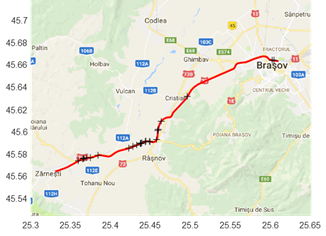

Figure 1: Detection of interesting locations for monitoring, in the railway line between Braşov to Zărneşti in Romania. The railway line is in red, in black the interesting locations.[1]

**Question 1.1**: Think openly about practical issues of this problem. Indicate three essential aspects or variables that will influence/limit the assignments of clusters to the different teams. 

- Severity: The first aspect to take into account is severity, since locations that are highly damaged might require specific procedures.   
- Priority: The second aspect to consider would the the priority of maintenance based on traffic density, where the team assigned to these locations will be required to perform fast paced work.
- Proximity: The third variable to consider would be the proximity between locations, since if a some locations are close to each other, these can be assigned to the same team.

For the next questions (1.2 and 1.3), we consider a single railway line (as in Figure 1), of about 25 kilometers long. GPS data of critical locations are mapped into a railway track kilometer position. The data consists of “N” values between 0 and 25, representing “N” important locations. We will make use of the most simple k-means algorithm. We assume an initialization of the centroids. Then, two steps are considered per iteration: 

1) assign points to the nearest centroid, <br>
2) update centroids according to the points assigned to them. 

The algorithm converges if the solution is the same as in the previous iteration. Assume the important locations are the following:

X = [2.9, 3.0, 3.1, 23.5, 23.6, 23.7]


**Question 1.2**: If the initialization of the centroids is at locations 3.0 and 23.6, how many iterations will the algorithm need to converge? 

- The initial centroids are already at the actual centroid of the two clusters, thus only 1 iteration is needed.

**Question 1.3**: If the initialization of the centroids is at two different random points x and y, x<y, with values between 0 and 25, how many iterations will the algorithm need to converge? Hint: the iterations will depend on the values you analyze for x and y. 

- In a worst case scenario, where the centroids are initialized with values that are larger than the largest point, or smaller than the smallest point,the algorithm would need 4 iterations. 

**Question 1.4**: In this question, we consider a part of the Dutch railway network. The interesting locations for monitoring are given in 2D coordinates and are fictive. Consider the dataset of a possible scenario in the file `NLLocations.csv`. Obtain an estimated knee point when evaluating within-cluster sums of point-to-centroid distances as a function of the number of clusters.

In [1]:
import pandas as pd
import numpy as np


dataNLloc = pd.read_csv('NLLocations.csv', header=None )
dataNLloc.head(3)

,0,1
0,51.740191,4.625758
1,51.717627,4.645504
2,51.727602,4.638934


Text(0, 0.5, 'Sum of point to centroid distances')

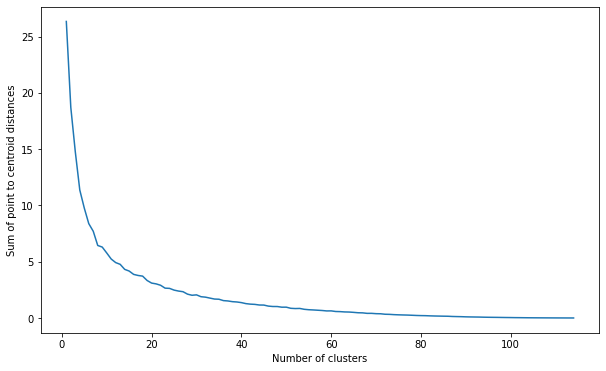

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt

K = []
pToCentSum = []
for k in range(1,len(dataNLloc)):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(dataNLloc)
    centroids = kmeans.cluster_centers_
    point_to_centroid_distances = pairwise_distances(dataNLloc, centroids, metric='euclidean')
    labels = kmeans.labels_
    pointToCentroidSum = np.sum([point_to_centroid_distances[i][label] for i, label in enumerate(labels)])
    K.append(k)
    pToCentSum.append(pointToCentroidSum)

plt.figure(figsize=(10,6))
plt.plot(K,pToCentSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of point to centroid distances')

- 20 clusters

### Question 2

Consider the problem of rail surface defect detection. This problem can be considered an anomaly detection problem, because in well-maintained railway infrastructures, most data you collect will belong to the healthy rail surface condition. In Figure 2, you can see examples of one type of those defects called squat. Although some small defects might disappear due to natural wear, others will dynamically change their condition from light to moderate to severe.


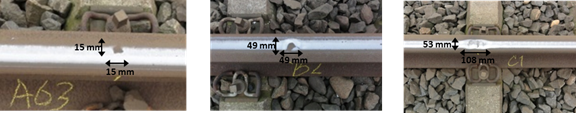
Figure 2: Representative squat defects[2]. (a) Light squat. (b) Moderate squat. (c) Severe squat.

We use an on-board measurement system to obtain two features per location related to the frequency content of the measurement signals. In total 84 locations are analyzed, consisting of both normal and defective rails. We will use the data from the file `RailDefects_Features.csv` to answer questions 2.1 and 2.2. We do not know which samples are normal and which ones are defects. Thus, we consider unsupervised clustering to gain insights into the obtained data. 

**Question 2.1**: Using k-means, with Euclidean distance, evaluate the within-cluster sums of point-to-centroid distances as a function of the number of clusters. Indicate a knee point for this data set. 

In [3]:
dataRailDefect = pd.read_csv('RailDefects_Features.csv', header=None )
dataRailDefect.head(3)

,0,1
0,0.088844,0.005533
1,0.060811,0.003108
2,0.218575,0.307813


Text(0, 0.5, 'Sum of point to centroid distances')

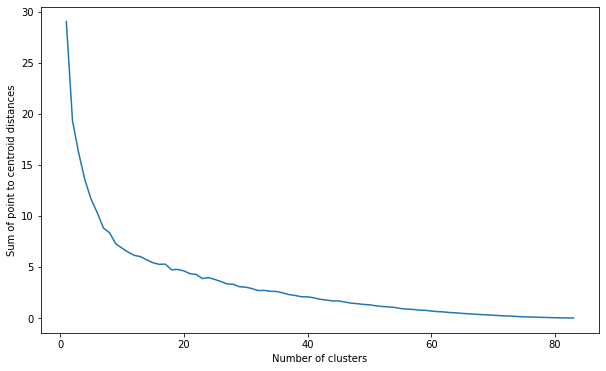

In [4]:
K = []
pToCentSum = []
data = dataRailDefect
for k in range(1,len(data)):
    
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    point_to_centroid_distances = pairwise_distances(data, centroids, metric='euclidean')
    labels = kmeans.labels_
    pointToCentroidSum = np.sum([point_to_centroid_distances[i][label] for i, label in enumerate(labels)])
    K.append(k)
    pToCentSum.append(pointToCentroidSum)
    
plt.figure(figsize=(10,6))
plt.plot(K,pToCentSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of point to centroid distances')

- 10 clusters

**Question 2.2**: Obtain the dendrogram using hierarchical clustering (with single linkage). Indicate the number of clusters obtained when the threshold level is “0.13”. Indicate the number of data points in those clusters. Then, provide insights into how to select a proper threshold using the dendrogram. Provide the threshold that your method would recommend. 

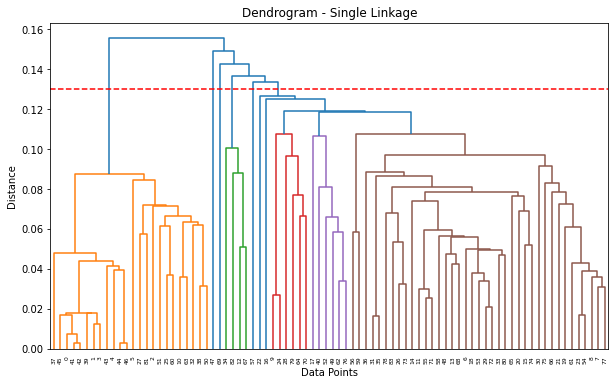

Number of clusters at threshold 0.13: 6
Number of data points in each cluster: [24  4 53  1  1  1]


In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data, method='single')

# Plot the dendrogram
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.axhline(y=0.13, color='r', linestyle='--')  
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


from scipy.cluster.hierarchy import fcluster

# Obtain clusters based on the threshold of 0.13
threshold = 0.13
clusters = fcluster(Z, t=threshold, criterion='distance')

num_clusters = len(np.unique(clusters))
print(f'Number of clusters at threshold {threshold}: {num_clusters}')

cluster_counts = np.bincount(clusters)
print(f'Number of data points in each cluster: {cluster_counts[1:]}')  # Skip 0 as it's unused

- The adequate treshold should be one just before the number of clusters increases significantly, but still low enough to not overgeneralize the data. Following this method, a treshold of 0.11 could be selected.

After your clustering analysis, the locations were verified by additional measurements and inspection. A list indicating normal and defective samples was made available: 0 for no visible defect and 1 for a visible defect. The list required to answer questions 2.3 and 2.4 is in `RailDefects_Validation.csv`.

**Question 2.3**: Assume that 4 clusters were chosen for k-means, and that the threshold level proposed to find the number of clusters with hierarchical clustering is 0.14. Evaluate how many clusters have only normal samples, only defective samples, and clusters with both normal and defective samples

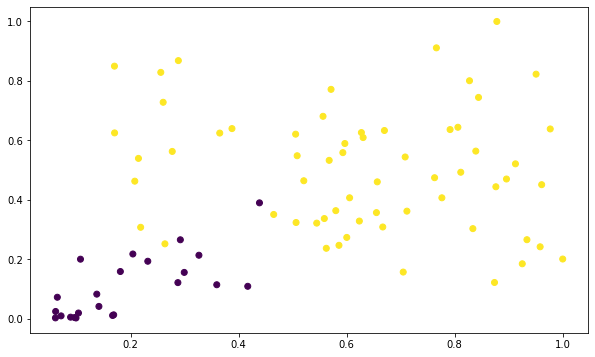

In [6]:
dataRailDefectVal = pd.read_csv('RailDefects_Validation.csv',header = None)
dataRailDefectVal

dataRail = pd.DataFrame()
dataRail = dataRailDefect
dataRail = pd.concat([dataRail,dataRailDefectVal], axis = 1)

plt.figure(figsize=(10,6))
plt.scatter(x = dataRail.iloc[:,0],y = dataRail.iloc[:,1], c = dataRail.iloc[:,2])



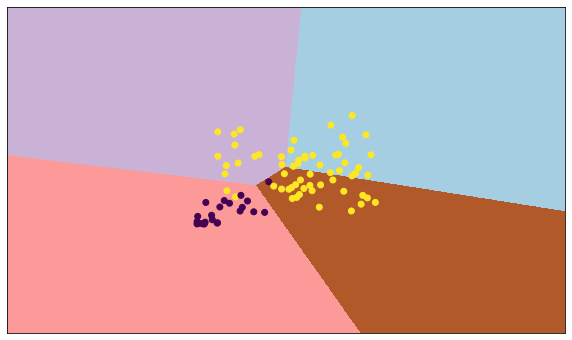

In [7]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(dataRailDefect)

#Based on https://scikit-learn.org/stable/auto_examples/cluster/
#  plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.002  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = dataRail.iloc[:,0].min() - 1, dataRail.iloc[:,0].max() + 1
y_min, y_max = dataRail.iloc[:,1].min() - 1, dataRail.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.scatter(
    x = dataRail.iloc[:,0],
    y = dataRail.iloc[:,1],
    c = dataRail.iloc[:,2]
)


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


- From visual inspection, it is clear that there are two cluster with only normal samples and two with both defective and normal samples. In addition, there are no clusters with only defective samples.

**Question 2.4**: Using k-means or hierarchical clustering, is it possible to fully separate this data into clusters with only normal and only defective samples? Is this always possible?

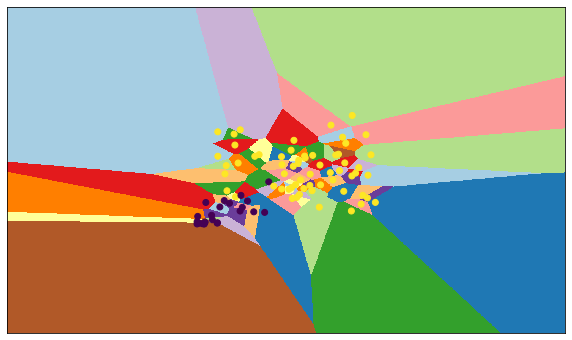

In [8]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=84, n_init='auto')
kmeans.fit(dataRailDefect)

#Based on https://scikit-learn.org/stable/auto_examples/cluster/
#  plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.002  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = dataRail.iloc[:,0].min() - 1, dataRail.iloc[:,0].max() + 1
y_min, y_max = dataRail.iloc[:,1].min() - 1, dataRail.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.scatter(
    x = dataRail.iloc[:,0],
    y = dataRail.iloc[:,1],
    c = dataRail.iloc[:,2]
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

- In the extreme case where the number of clusters is equal to the number of samples, then each cluster will only have one point, thus in this case each cluster will only have either normal or defective samples.

***
Below you can find some useful code snippets as well as links to the documentation of the methods that you will need to use in this assignment

Reading data:

In [9]:
import pandas as pd

data = pd.read_csv("NLLocations.csv")

# To show the first 5 rows (entries)
data.head()

,51.740190528,4.6257580192
0,51.717627,4.645504
1,51.727602,4.638934
2,51.802819,4.678787
3,51.802723,4.709335
4,51.815579,4.640566


Visualization:

In [10]:
from matplotlib import pyplot as plt

# To increase the size of the figures (for readability issues with dendrogram for example)
# you can specify the size of the resulting figure beforehand
plt.figure(figsize=(20, 20))

# To visualize the clusters you can create a scatter plot
# Using a unique color and/or marker allows you to easily distinguish the different clusters
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(X-coords, Y-coords, marker=unique_marker, c=unique_color)

# To visualize a line graph you can use the default plot
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(X-coords, Y-coords)


NameError: name 'X' is not defined

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Randomly generate coordinates
x_coords = np.random.random(20)
y_coords = np.random.random(20)

# Pick marker styles
markers = ['o', '^', 'X', '*']

# Generate 4 colors
colors = cm.rainbow(np.linspace(0, 1, 4))

#Plot the dataset using different colors and markers each time 
plt.figure(figsize=(5, 5))
plt.scatter(x_coords[0:5], y_coords[0:5], marker=markers[0], color=colors[0])
plt.scatter(x_coords[5:10], y_coords[5:10], marker=markers[1], color=colors[1])
plt.scatter(x_coords[10:15], y_coords[10:15], marker=markers[2], color=colors[2])
plt.scatter(x_coords[15:20], y_coords[15:20], marker=markers[3], color=colors[3])
plt.show()

For k-Means use the k-Means implementation of scikit, more information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

For hierarchical clustering use the implementation of scikit, more information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). 

To create a dendrogram use the implementation of scipy, more information can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

To get the within-cluster sum of squares for k-Means you can use `.inertia_`, to get the labels assigned to each item after clustering you can use `.labels_`.

***

Acknowledgment: This assignment was developed by Alfredo Núñez and Hongrui Wang with the support of Kevin Chong, Jurjen Hendriks, Taniya Kapoor and Siwarak Unsiwilai. Suggestions and comments, please send to the email A.A.NunezVicencio@tudelft.nl

[1] A. Núñez, A. Jamshidi, and H. Wang, “Pareto-based maintenance decisions for regional railways with uncertain weld conditions using the Hilbert spectrum of axle box acceleration”. IEEE Transactions on Industrial Informatics, Volume 15, Issue 3, March 2019, Pages: 1496-1507. DOI: 10.1109/TII.2018.2847736

[2] Z. Li, M. Molodova, A. Núñez, and R. Dollevoet, “Improvements in axle box acceleration measurements for the detection of light squats in railway infrastructure”. IEEE Transactions on Industrial Electronics. Volume 62, Issue 7, July 2015, Pages: 4385-4397. DOI:10.1109/TIE.2015.2389761
